## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data=mouse_metadata.merge(study_results,on="Mouse ID")
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Checking the number of mice in the DataFrame.

total_mice=len(study_results["Mouse ID"].unique())

pd.DataFrame({
    "Total number of mice": [total_mice]
})

,Total number of mice
0,249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

study_results.loc[study_results["Mouse ID"]=="g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

complete_data=complete_data.set_index("Mouse ID")
complete_data.head()
clean_complete_data=complete_data.drop(index='g989')
clean_complete_data=clean_complete_data.reset_index()
clean_complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
clean_complete_data["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

In [8]:
clean_complete_data.loc[clean_complete_data["Mouse ID"]=="f545",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
841,f545,Zoniferol,Female,20,26,0,45.000000,0
842,f545,Zoniferol,Female,20,26,5,46.565813,0
843,f545,Zoniferol,Female,20,26,10,51.072512,0
844,f545,Zoniferol,Female,20,26,15,53.945544,1
845,f545,Zoniferol,Female,20,26,20,58.841189,1
846,f545,Zoniferol,Female,20,26,25,60.253481,1
847,f545,Zoniferol,Female,20,26,30,65.893986,1
848,f545,Zoniferol,Female,20,26,35,66.742924,1
849,f545,Zoniferol,Female,20,26,40,71.108118,1
850,f545,Zoniferol,Female,20,26,45,73.324432,1


In [9]:
# Checking the number of mice in the clean DataFrame.

total_mice=len(clean_complete_data["Mouse ID"].unique())

pd.DataFrame({
    "Total number of mice": [total_mice]
})

,Total number of mice
0,248


## Summary Statistics

In [66]:
drug_regimen=clean_complete_data["Drug Regimen"].unique()
print(drug_regimen)
number_of_drugs=len(drug_regimen)
number_of_drugs

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


10

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_complete_data_stats=clean_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({np.mean,np.median,np.var,np.std,st.sem})
clean_complete_data_stats=clean_complete_data_stats[["mean","median","var","std","sem"]]
clean_complete_data_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [96]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

clean_complete_data.head()

mice_per_timepoint=clean_complete_data[["Mouse ID","Drug Regimen","Timepoint"]]
mice=mice_per_timepoint.groupby(["Timepoint","Drug Regimen"]).count().reset_index()
mice_plot_data=pd.DataFrame(mice).rename(columns={"Mouse ID":"Mice"})
mice_plot_data.head()
# print(mice)

# number_of_mice=mice["Mouse ID"]
# number_of_mice



,Timepoint,Drug Regimen,Mice
0,0,Capomulin,25
1,0,Ceftamin,25
2,0,Infubinol,25
3,0,Ketapril,25
4,0,Naftisol,25


In [46]:
x_axis=np.arange(0,450)

In [65]:
timepoints=mice_per_timepoint["Timepoint"].unique()

timepoints=[x for x in timepoints]

timepoints

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

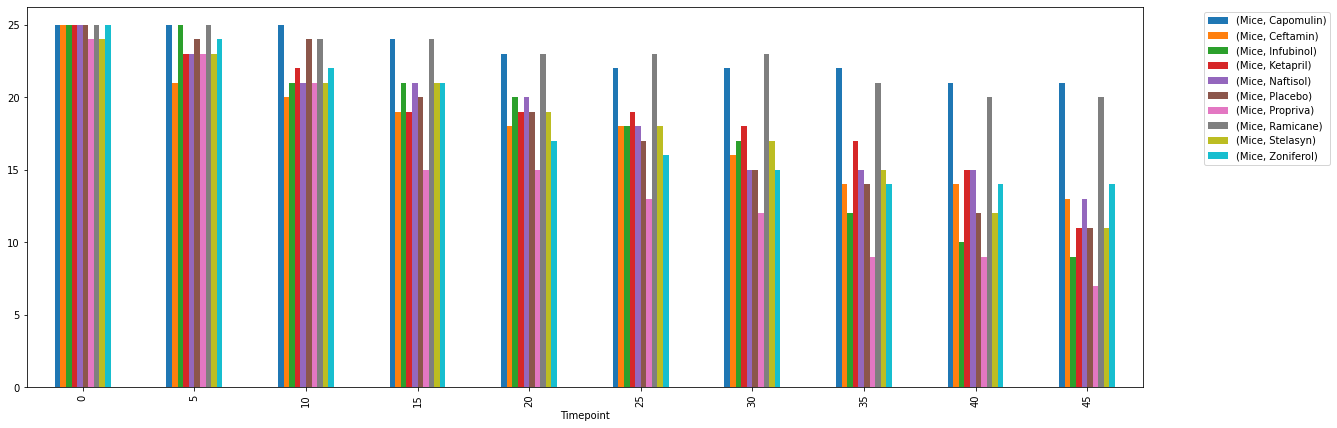

In [123]:
data = mice_plot_data.set_index(['Timepoint', 'Drug Regimen'])
data.unstack().plot(kind='bar',figsize=(20,7))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
